In [18]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import numpy as np
from numpy import array, zeros, arange, exp, random, ones_like, zeros_like,ones
from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.signal import convolve,convolve2d,correlate2d,correlate
from imageio import imread
import itertools,math
import matplotlib.pyplot as plt
import unittest
from PIL import  Image


# Color Model

(1) Converting a 24-bit RGB color (60,100,200) to HSI space. Please write down your calculation details. (Hint: Please normalize the value to [0,1] first).

Your answer:

Firstly, normalize the RGB value to [0, 1], respectively
$$
R, G, B = R/255, G/255, B/255
$$
Then compute H, S, and I according to the following formulations
$$
\begin{equation}
H =
\begin{cases}
\theta & G \geq B \\
2\pi - \theta & G < B
\end{cases}
\end{equation}
$$
$$
S = 1-\frac{3}{R + G + B}min(R, G, B)
$$
$$
I = \frac{R + G + B}{3}
$$
where
$$
\theta = cos^{-1}(\frac{(R - G) + (R - B)}{2\sqrt{(R-G)^2 + (R-B)(G-B)}})
$$

(2) Load the image “BerkeleyTower.png”. Normalize the pixel value
to [0,1] and convert R/G/B into H/S/I respectively. Use imshow to present the original
image and converted image in the same figure.

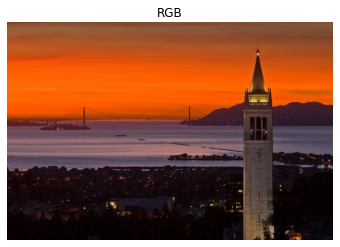

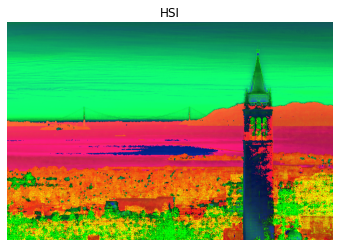

In [19]:

img = np.array(Image.open('BerkeleyTower.png',).convert('RGB'))    # 打开图片转换为numpy数组


def RGBtoHSI(RGBimage):
    HSIimage = np.zeros_like(RGBimage)
    ################# your code #####################
    h, w, c = RGBimage.shape
    for i in range(h):
        for j in range(w):
            [R, G, B] = RGBimage[i, j, :]/255
            theta = np.arccos((R - G + R - B)/(2 * np.sqrt((R - G)**2 + (R - B)*(G - B) + 1e-7)))
            if G >= B:
                H = theta
            else:
                H = 2 * np.pi - theta
            H /= (2 * np.pi)
            summation = R + G + B
            S = 1 - 3 * min(R, G, B) / (summation + 1e-7)
            I = summation / 3
            HSIimage[i, j, :] = [H*255, S*255, I*255]
    HSIimage = (np.clip(HSIimage, 0, 255)).astype(np.uint8)
    ################# your code #####################
    return HSIimage


plt.imshow(img)
plt.title('RGB')
plt.axis('off')
plt.show()

hsi = RGBtoHSI(img)
plt.imshow(hsi)
plt.title('HSI')
plt.axis('off')      # 不显示坐标
plt.show()



# Image restoration

Given the image “BerkeleyTower.png”, first convert it to from RGB image to Gray image.
(rgb2gray) as f(x, y). Normalize the value to [0,1]. Transform image f into frequency
domain F(u, v).

In [20]:
image = np.array(Image.open('BerkeleyTower.png',).convert('L'))    # 打开图片转换为numpy数组
image = np.array(image, np.uint8) / 255
# fft
f = np.fft.fft2(image)
# this shift convert the low frequency part to the center of the image, it is for visualization
fshift = np.fft.fftshift(f)

(1) Apply motion blur to the image f as shown in Example 5.10 at page 350 [1]:

G(u, v) = H(u, v)F(u, v)

H(u, v) = (𝑇 / 𝜋(𝑢𝑎+𝑣𝑏)) * sin(𝜋(𝑢𝑎 + 𝑣𝑏)) * exp(−𝑗𝜋(𝑢𝑎+𝑣𝑏)),

Where a=b=0.1, T = 1. Show the original image and blurred image in both spatial
domain and frequency domain.

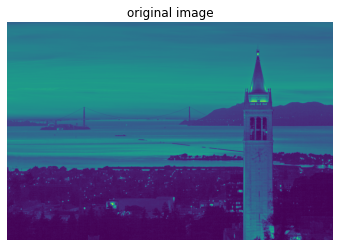

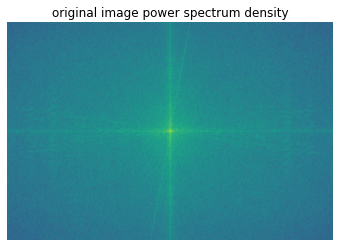

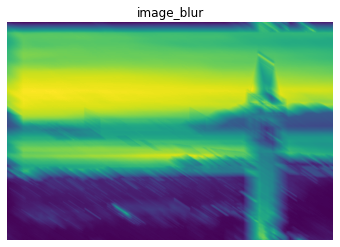

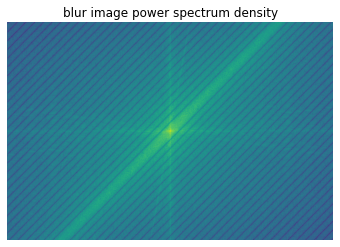

In [21]:
a = 0.05
b = 0.05
T = 1

def motion_blur(F):
    H = np.zeros_like(F)
    ######### your code ###########
    h, w = H.shape
    for u in range(h):
        for v in range(w):
            u_shift, v_shift = u - h / 2, v - w / 2
            H[u, v] = T * np.sin(np.pi * (u_shift * a + v_shift * b)) * \
                np.exp(-1j * np.pi * (u_shift * a + v_shift * b)) / (np.pi * (u_shift * a + v_shift * b))
    ######### your code ###########
    return H

H = motion_blur(fshift)
image_blur_fourier = fshift * H 
image_blur =  np.abs(np.real( np.fft.ifft2( np.fft.ifftshift(image_blur_fourier) )))
image_blur_fourier = np.fft.fftshift( np.fft.fft2(image_blur))
plt.imshow(image )
plt.title('original image')
plt.axis('off')
plt.show()     # 不显示坐标
plt.imshow(np.log(np.abs(fshift)) )
plt.title('original image power spectrum density')
plt.axis('off') 
plt.show()     # 不显示坐标
plt.imshow(image_blur)
plt.title('image_blur')
plt.axis('off')      # 不显示坐标
plt.show()  
plt.imshow(np.log(np.abs(image_blur_fourier)) )
plt.title('blur image power spectrum density')
plt.axis('off') 
plt.show()     # 不显示坐标

(2) Add Gaussian noise to the blurred image g. You can use numpy.random.normal function
imnoise directly. Denote the processed image as r. Show g and r in both spatial
domain and frequency domain in the same figure. Test different parameters of
Gaussian noise: (mean, variance) = (0, 0.001), (0, 0.01), (0, 0.1).

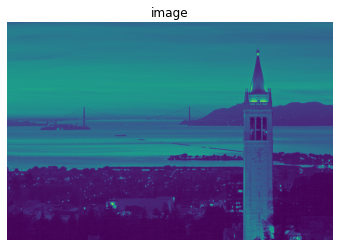

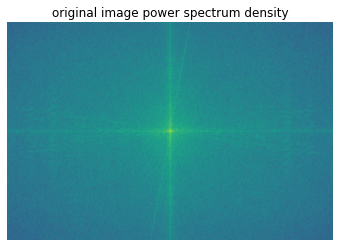

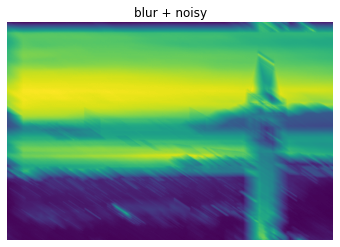

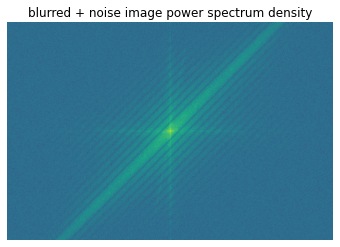

In [27]:
mean = 0
var = 0.001

####### your code ######
noise = np.random.normal(mean, var, image.shape)
image_blur_noisy = image_blur + noise
image_bn_fourier = np.fft.fftshift( np.fft.fft2(image_blur_noisy))
####### your code ######


plt.imshow(image )
plt.title('image')
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(fshift)) )
plt.title('original image power spectrum density')
plt.axis('off') 
plt.show()     # 不显示坐标
plt.imshow(image_blur_noisy )
plt.title('blur + noisy')
plt.axis('off') 
plt.show()
plt.imshow(np.log(np.abs(image_bn_fourier)) )
plt.title('blurred + noise image power spectrum density')
plt.axis('off') 
plt.show() 

(3) For the degraded image r, try wiener filtering and show
your results.

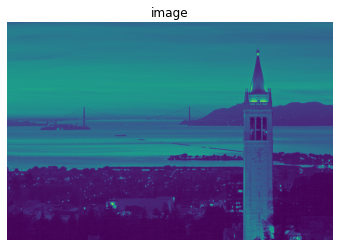

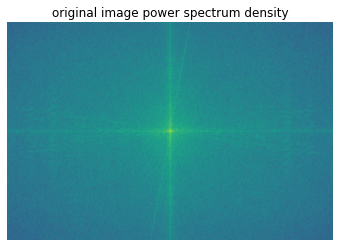

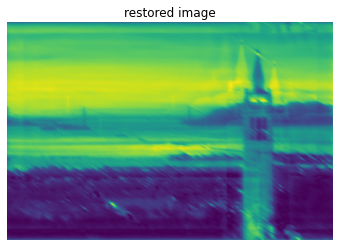

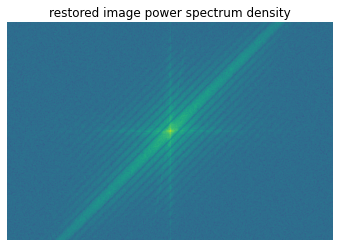

In [31]:
K = var / np.var(image_blur_noisy)


def wiener(input_fft, PSF,K):  
    ###### you code #######
    W = np.zeros_like(input_fft)
    h, w = input_fft.shape
    for u in range(h):
        for v in range(w):
            u_shift, v_shift = u - round(h / 2), v - round(w / 2)
            W[u, v] = np.abs(PSF[u_shift, v_shift])**2 / (PSF[u_shift, v_shift] * (np.abs(PSF[u_shift, v_shift])**2 + K))
    W = np.fft.fftshift(W)
    result = np.abs(np.real(np.fft.ifft2(np.fft.ifftshift(W * input_fft))))
    ###### you code #######
    return result



image_restore = wiener(image_bn_fourier,H,K)

image_restore_fourier = np.fft.fftshift(np.fft.fft2(image_restore))

plt.imshow(image )
plt.title('image')
plt.axis('off')
plt.show()
plt.imshow(np.log(np.abs(fshift)))
plt.title('original image power spectrum density')
plt.axis('off')
plt.show()

plt.imshow(image_restore)
plt.title('restored image')
plt.axis('off')
plt.show()

plt.imshow(np.log(np.abs(image_bn_fourier)))
plt.title('restored image power spectrum density')
plt.axis('off')
plt.show()